<a href="https://colab.research.google.com/github/Hassibayub/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd_Edition---Notebook/blob/master/Chapter%203%20MNIST/%20Chapter_3_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (10,8)

## Question 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the `KNeighborsClassifier` test set. Hint: the works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weight` and `n_neighbor` hyperparameters).


In [3]:
# fetch MNIST datset
data = fetch_openml('mnist_784', version=1)

In [4]:
data.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
data.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X, y = data.data, data.target

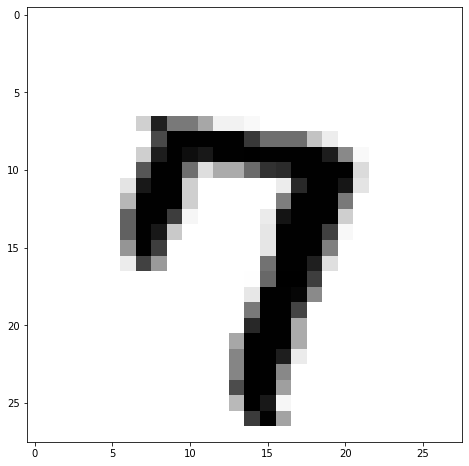

7


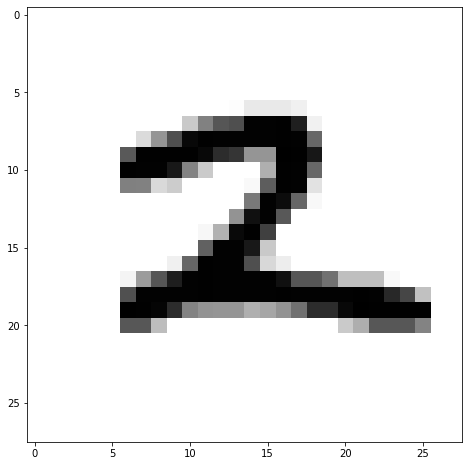

2


In [7]:
# split data train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 42)
plt.imshow(x_train[4].reshape(28,28), cmap='binary')
plt.show()
print(y_train[4])

plt.imshow(x_test[7].reshape(28,28), cmap='binary')
plt.show()
print(y_test[7])

In [8]:
y_test, y_train = y_test.astype(np.uint8), y_train.astype(np.uint8)
y_test[7]

2

In [9]:
## KNN classifier as in question

knnclf = KNeighborsClassifier()

In [10]:
y_train

array([0, 4, 4, ..., 1, 0, 0], dtype=uint8)

In [11]:
knnclf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
somedigit = x_test[7]
val = knnclf.predict([somedigit])
print(y_test[7], val)

2 [2]


In [13]:
# cross_val_score(knnclf, x_train, y_train, cv=3, scoring='accuracy')
# output: array([0.96583813, 0.96632584, 0.96491765])

In [14]:
parameters = {
    'n_neighbors':[1,3,5],
    'weights':['uniform', 'distance']
}
gscv = GridSearchCV(knnclf, param_grid=parameters, scoring='accuracy', verbose=10, cv=3)


In [15]:
# gscv.fit(x_train, y_train)
# gscv.best_estimator_

## 2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion

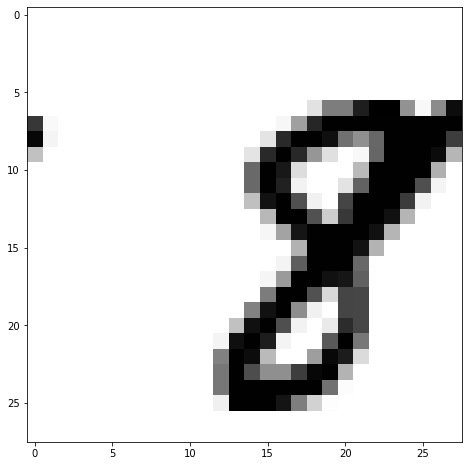

In [16]:
sample = X[55]
sample = np.roll(sample, 5)
sample = sample.reshape(28,28)
plt.imshow(sample, cmap='binary')
plt.show()

In [17]:
a = X[55].shape
b = X[55].reshape(28,28).reshape(-1).shape
np.equal(a,b)

array([ True])

In [18]:
# image agumentation definition

def shift_right(img):
    img = img.reshape(28,28)
    img = np.roll(img, 2)
    img = img.reshape(1, -1)
    return img

def shift_left(img):
    img = img.reshape(28,28)
    img = np.roll(img, -2)
    img = img.reshape(1, -1)
    return img

def shift_up(img):
    img = img.reshape(28,28)
    img = np.rot90(img)
    img = np.roll(img, -2)
    img = np.rot90(img, 3)
    img = img.reshape(1, -1)
    return img

def shift_down(img):
    img = img.reshape(28,28)
    img = np.rot90(img)
    img = np.roll(img, 2)
    img = np.rot90(img, 3)
    img = img.reshape(1, -1)
    return img

In [19]:
images, labels = X.copy(), y
images.shape, labels.shape

((70000, 784), (70000,))

In [20]:
# from concurrent.futures import ThreadPoolExecutor

# def augmentation(img, lab):
#     np.append(X, shift_right(img), axis=0)
#     np.append(y, lab)
#     np.append(X, shift_left(img), axis=0)
#     np.append(y, lab)
#     np.append(X, shift_up(img), axis=0)
#     np.append(y, lab)
#     np.append(X, shift_down(img), axis=0)
#     np.append(y, lab)

# with ThreadPoolExecutor() as ex:
#     ex.map(augmentation, args=[img, lab]) 

In [21]:
# for i in range(len(images)):

#     img, lab = images[i], labels[i]

#     images = np.append(images, shift_right(img), axis=0)
#     labels = np.append(labels, lab)
#     images = np.append(images, shift_left(img), axis=0)
#     labels = np.append(labels, lab)
#     images = np.append(images, shift_up(img), axis=0)
#     labels = np.append(labels, lab)
#     images = np.append(images, shift_down(img), axis=0)
#     labels = np.append(labels, lab) 

#     print(f">>>>> END {i} <<<<<<<")


In [22]:
images.shape, labels.shape

((70000, 784), (70000,))

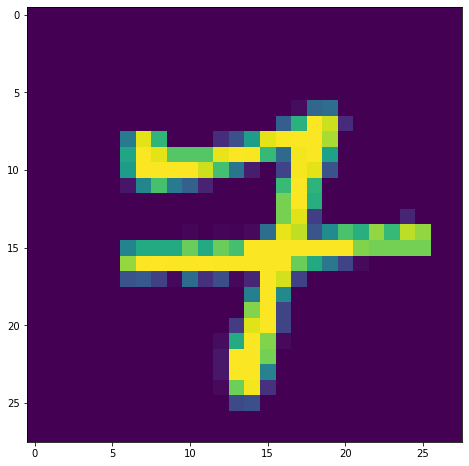

'7'

In [23]:
number = 7866
plt.imshow(images[number].reshape(28,28))
plt.show()
labels[number]

In [24]:
len(images)

70000

In [25]:
limit = 94921
x_train, x_test = images[:limit], images[limit:]
y_train, y_test = labels[:limit], labels[limit:]


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(70000, 784) (70000,) (0, 784) (0,)


In [ ]:
# cross_val_score(knnclf, x_train, y_train, cv=3, scoring='accuracy')
# output: array([0.96649916, 0.96510746, 0.81046144])

## 3. Tackle the Titanic dataset. A great place to start is on Kaggle.
